<a href="https://colab.research.google.com/github/tnusser/ImageRetrieval/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports


In [1]:
import tensorflow as tf
import numpy as np
import sklearn
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Flatten, Conv2DTranspose, Reshape
from keras.models import Model, Sequential
import keras.backend as K 
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 3.1 Dataset Preparation

In [7]:
 (raw_x_train, raw_y_train), (raw_x_test, raw_y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [33]:
x_train = (raw_x_train/255).astype("float32")
x_test = (raw_x_test/255).astype("float32")

## 3.2 Building the Autoencoder

In [34]:
x_val = x_train[:1000]
x_train = x_train[1000:100000]

In [36]:
i = Input(shape=(32, 32, 3))
e1 = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
e2 = MaxPooling2D(pool_size=(2, 2))(e1)
e3 = Conv2D(64, (3, 3), activation="relu")(e2)
e4 = MaxPooling2D(pool_size=(3, 3))(e3)
e5 = Conv2D(128, (3,3), activation="relu")(e4)
e6 = Flatten()(e5)
e7 = Dense(10, activation='relu')(e6)

encoder = Model(i, e7, name='encoder')
encoder.summary()

conv_shape = K.int_shape(e1)
d_i = Input(shape=(10,))
d1 = Dense(conv_shape[1] * conv_shape[2] * conv_shape[3], activation='relu',)(d_i)
d2 = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(d1)
d4 = Conv2DTranspose(filters=32, kernel_size=3, activation="relu", padding="same")(d2)
d5 = Conv2DTranspose(filters=16, kernel_size=3, activation="relu", padding="same")(d4)
d6 = Conv2DTranspose(filters=3, kernel_size=3, activation="sigmoid", padding="same")(d5)

decoder = Model(d_i, d6, name='decoder')
decoder.summary()


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0   

In [25]:
autoencoder_outputs = decoder(encoder(i))
autoencoder = Model(i, autoencoder_outputs, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
encoder (Model)              (None, 10)                21962     
_________________________________________________________________
decoder (Model)              (None, 32, 32, 3)         365571    
Total params: 387,533
Trainable params: 387,501
Non-trainable params: 32
_________________________________________________________________


In [37]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = autoencoder.fit(x_train, x_train, validation_data=(x_val, x_val), epochs=10, batch_size=512)

Train on 49000 samples, validate on 1000 samples
Epoch 1/10
49000/49000 [==============================] - 133s 3ms/step - loss: 0.0271 - accuracy: 0.5923 - val_loss: 0.0279 - val_accuracy: 0.5860
Epoch 2/10
49000/49000 [==============================] - 130s 3ms/step - loss: 0.0261 - accuracy: 0.5970 - val_loss: 0.0279 - val_accuracy: 0.5763
Epoch 3/10
49000/49000 [==============================] - 130s 3ms/step - loss: 0.0261 - accuracy: 0.5968 - val_loss: 0.0267 - val_accuracy: 0.5762
Epoch 4/10
49000/49000 [==============================] - 130s 3ms/step - loss: 0.0260 - accuracy: 0.5977 - val_loss: 0.0273 - val_accuracy: 0.5739
Epoch 5/10
49000/49000 [==============================] - 130s 3ms/step - loss: 0.0259 - accuracy: 0.5980 - val_loss: 0.0269 - val_accuracy: 0.5879
Epoch 6/10
49000/49000 [==============================] - 133s 3ms/step - loss: 0.0259 - accuracy: 0.5976 - val_loss: 0.0279 - val_accuracy: 0.6035
Epoch 7/10
49000/49000 [==============================] - 131s 

KeyboardInterrupt: ignored

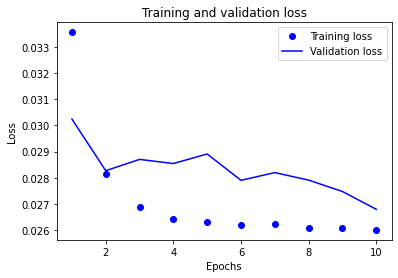

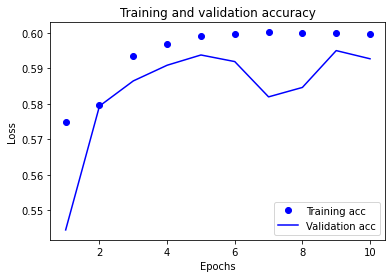

In [29]:
# Loss plot
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy plot
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()